In [1]:
## Overview

In [2]:
# df - main dataframe 

In [114]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Libraries

In [115]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import re
import warnings
import os
warnings.filterwarnings('ignore')

## Reading CSV data

In [116]:
current_dir = os.getcwd()

print(current_dir)

/home/jovyan/ukol1_tmp


In [117]:
raw_data = pd.read_csv("incident_event_log.csv")
metadata = pd.read_csv("irt_metadata_csv.csv")
df = raw_data

In [118]:
df.columns = df.columns.str.strip()

In [119]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


## Metadata - Attribute Descriptions

In [120]:
metadata

,Attribute,Description
0,1. number,"incident identifier (24,918 different values);"
1,2. incident state,eight levels controlling the incident managem...
2,3. active,boolean attribute that shows whether the reco...
3,4. reassignment_count,number of times the incident has the group or...
4,5. reopen_count,number of times the incident resolution was r...
5,6. sys_mod_count,number of incident updates until that moment;
6,7. made_sla,boolean attribute that shows whether the inci...
7,8. caller_id,identifier of the user affected;
8,9. opened_by,identifier of the user who reported the incid...
9,10. opened_at,incident user opening date and time;


## Data types

In [121]:
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

In [122]:
# Label columns
def add_prefix(df_arg):
    for column in df_arg.columns:
        if df_arg[column].dtype == 'object':
            df_arg = df_arg.rename(columns={column: 'C_' + column})
        elif df_arg[column].dtype == 'float64' or df_arg[column].dtype == 'int64':
            df_arg = df_arg.rename(columns={column: 'N_' + column})
        elif df_arg[column].dtype == 'bool' or df_arg[column].dtype == 'bool':
            df_arg = df_arg.rename(columns={column: 'C_' + column})
    return df_arg

df = add_prefix(df)

In [123]:
df = df.rename(columns={'C_opened_at':'N_opened_at','C_sys_created_at':'N_sys_created_at','C_sys_updated_at':'N_sys_updated_at','C_resolved_at':'N_resolved_at','C_closed_at':'N_closed_at'})

In [124]:
# úprava datumových formátů
dt_columns = ['N_opened_at','N_sys_created_at','N_sys_updated_at','N_resolved_at','N_closed_at']
date_time = df[dt_columns]
date_time = date_time.apply(lambda x: pd.to_datetime(x, dayfirst=True, format='%d/%m/%Y %H:%M', errors='coerce'))
date_time.head()

,N_opened_at,N_sys_created_at,N_sys_updated_at,N_resolved_at,N_closed_at
0,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 01:23:00,2016-02-29 11:29:00,2016-03-05 12:00:00
1,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 08:53:00,2016-02-29 11:29:00,2016-03-05 12:00:00
2,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 11:29:00,2016-02-29 11:29:00,2016-03-05 12:00:00
3,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-03-05 12:00:00,2016-02-29 11:29:00,2016-03-05 12:00:00
4,2016-02-29 04:40:00,2016-02-29 04:57:00,2016-02-29 04:57:00,2016-03-01 09:52:00,2016-03-06 10:00:00


In [125]:
df[date_time.columns] = date_time

In [126]:
# Calculating the difference between resolved_at and opened_at
df['T_hours'] = (date_time['N_resolved_at'] - date_time['N_opened_at']).dt.total_seconds() / 3600
df[['N_opened_at', 'N_resolved_at', 'T_hours']].head(10)

,N_opened_at,N_resolved_at,T_hours
0,2016-02-29 01:16:00,2016-02-29 11:29:00,10.216667
1,2016-02-29 01:16:00,2016-02-29 11:29:00,10.216667
2,2016-02-29 01:16:00,2016-02-29 11:29:00,10.216667
3,2016-02-29 01:16:00,2016-02-29 11:29:00,10.216667
4,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
5,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
6,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
7,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
8,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000
9,2016-02-29 04:40:00,2016-03-01 09:52:00,29.200000


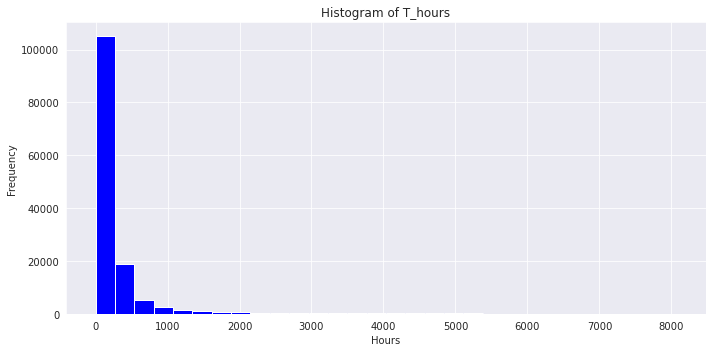

count    138571.000000
mean        269.596262
std         650.867377
min           0.000000
2.5%          0.050000
10%           0.216667
25%           4.066667
50%          73.516667
75%         262.183333
90%         568.250000
97.5%      2060.933333
max        8070.166667
Name: T_hours, dtype: float64

In [127]:
plt.figure(figsize=(10, 5))
plt.hist(df['T_hours'], bins=30, color='blue')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Histogram of T_hours')

plt.tight_layout()
plt.show()

perc = [0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975]
display(df['T_hours'].describe(percentiles=perc))

In [128]:
df.isna().sum()

C_number                         0
C_incident_state                 0
C_active                         0
N_reassignment_count             0
N_reopen_count                   0
N_sys_mod_count                  0
C_made_sla                       0
C_caller_id                      0
C_opened_by                      0
N_opened_at                      0
C_sys_created_by                 0
N_sys_created_at             53076
C_sys_updated_by                 0
N_sys_updated_at                 0
C_contact_type                   0
C_location                       0
C_category                       0
C_subcategory                    0
C_u_symptom                      0
C_cmdb_ci                        0
C_impact                         0
C_urgency                        0
C_priority                       0
C_assignment_group               0
C_assigned_to                    0
C_knowledge                      0
C_u_priority_confirmation        0
C_notify                         0
C_problem_id        

In [129]:
# Treat "?" as NA value
df.apply(lambda x: x[x == "?"].count())

C_number                          0
C_incident_state                  0
C_active                          0
N_reassignment_count              0
N_reopen_count                    0
N_sys_mod_count                   0
C_made_sla                        0
C_caller_id                      29
C_opened_by                    4835
N_opened_at                       0
C_sys_created_by              53076
N_sys_created_at                  0
C_sys_updated_by                  0
N_sys_updated_at                  0
C_contact_type                    0
C_location                       76
C_category                       78
C_subcategory                   111
C_u_symptom                   32964
C_cmdb_ci                    141267
C_impact                          0
C_urgency                         0
C_priority                        0
C_assignment_group            14213
C_assigned_to                 27496
C_knowledge                       0
C_u_priority_confirmation         0
C_notify                    

In [130]:
df = df.replace({'?': pd.NA})
df.isna().sum(axis=0)

C_number                          0
C_incident_state                  0
C_active                          0
N_reassignment_count              0
N_reopen_count                    0
N_sys_mod_count                   0
C_made_sla                        0
C_caller_id                      29
C_opened_by                    4835
N_opened_at                       0
C_sys_created_by              53076
N_sys_created_at              53076
C_sys_updated_by                  0
N_sys_updated_at                  0
C_contact_type                    0
C_location                       76
C_category                       78
C_subcategory                   111
C_u_symptom                   32964
C_cmdb_ci                    141267
C_impact                          0
C_urgency                         0
C_priority                        0
C_assignment_group            14213
C_assigned_to                 27496
C_knowledge                       0
C_u_priority_confirmation         0
C_notify                    

## Check if incident has all events

In [131]:
# Group the DataFrame by the incident number and count the number of rows for each incident
incident_counts = df.groupby('C_number').size().reset_index(name='incident_count')

# Filter the DataFrame for rows where incident_state is "closed" and calculate the total sys_mod_count for each incident
closed_sys_mod_counts = df[df['C_incident_state'] == 'Closed'].groupby('C_number')['N_sys_mod_count'].sum().reset_index(name='N_sys_mod_count')

# Increment the sys_mod_count by 1 to account for starting at 0
closed_sys_mod_counts['N_sys_mod_count'] += 1

# Merge the incident_counts and closed_sys_mod_counts on the incident number
merged_counts = incident_counts.merge(closed_sys_mod_counts, on='C_number')

# Check if the number of sys_mod_count is equal to the number of rows for each incident
merged_counts['counts_equal'] = merged_counts['incident_count'] == merged_counts['N_sys_mod_count']

print("Are the number of sys_mod_count equal to the number of rows for each closed incident?")
print(merged_counts)

Are the number of sys_mod_count equal to the number of rows for each closed incident?
         C_number  incident_count  N_sys_mod_count  counts_equal
0      INC0000045               4                5         False
1      INC0000047               9                9          True
2      INC0000057               7                7          True
3      INC0000060               4                4          True
4      INC0000062               8                8          True
...           ...             ...              ...           ...
24913  INC0120304               3                3          True
24914  INC0120319               2                2          True
24915  INC0120495               6                6          True
24916  INC0120835               4                5         False
24917  INC0121064               4                4          True

[24918 rows x 4 columns]


## Check of False cases where sys_mod_count != incident_count

In [132]:
false_df = df[df['C_number'].isin(merged_counts[merged_counts['counts_equal'] == False]['C_number'])]
false_df = false_df[false_df['C_incident_state'] == 'Closed']
false_df

,C_number,C_incident_state,C_active,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,C_caller_id,C_opened_by,N_opened_at,...,C_notify,C_problem_id,C_rfc,C_vendor,C_caused_by,C_closed_code,C_resolved_by,N_resolved_at,N_closed_at,T_hours
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,10.216667
61,INC0000065,Closed,False,6,0,13,True,Caller 5323,Opened by 131,2016-02-29 07:38:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 1,Resolved by 197,2016-03-02 15:21:00,2016-03-07 16:00:00,55.716667
84,INC0000070,Closed,False,1,0,9,False,Caller 3757,Opened by 131,2016-02-29 08:11:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 11,Resolved by 30,2016-03-08 09:55:00,2016-03-24 18:40:00,193.733333
98,INC0000073,Closed,False,1,0,6,True,Caller 2519,Opened by 40,2016-02-29 08:22:00,...,Do Not Notify,Problem ID 2,<NA>,<NA>,<NA>,code 11,Resolved by 208,2016-03-01 15:37:00,2016-03-06 16:00:00,31.250000
104,INC0000074,Closed,False,0,0,19,False,Caller 527,Opened by 433,2016-02-29 08:23:00,...,Do Not Notify,<NA>,CHG0000404,<NA>,<NA>,code 6,Resolved by 158,2016-04-11 14:39:00,2016-04-16 15:07:00,1014.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141492,INC0114952,Closed,False,1,0,5,False,Caller 4426,Opened by 435,2017-01-31 22:36:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 8,2017-02-09 14:24:00,2017-02-14 15:00:00,207.800000
141567,INC0115739,Closed,False,0,0,4,False,Caller 2503,Opened by 239,2017-02-02 11:41:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 112,2017-02-08 09:27:00,2017-02-13 10:00:00,141.766667
141570,INC0115743,Closed,False,0,0,4,False,Caller 2503,Opened by 239,2017-02-02 11:44:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,Resolved by 112,2017-02-08 09:43:00,2017-02-13 10:00:00,141.983333
141669,INC0118999,Closed,False,0,0,6,True,Caller 2058,Opened by 194,2017-02-10 15:55:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,Resolved by 110,2017-02-10 16:35:00,2017-02-15 17:00:00,0.666667


In [133]:
false_df.describe()

,N_reassignment_count,N_reopen_count,N_sys_mod_count,T_hours
count,9337.000000,9337.000000,9337.000000,9326.000000
mean,1.689622,0.029881,12.296883,419.878453
std,2.068103,0.229718,11.695999,782.451819
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,6.000000,94.970833
50%,1.000000,0.000000,9.000000,192.200000
75%,2.000000,0.000000,14.000000,378.095833
max,27.000000,8.000000,129.000000,8070.166667


In [134]:
counts_equal_sum = merged_counts['counts_equal'].value_counts()

print("Counts of True and False values in counts_equal:")
print(counts_equal_sum)

Counts of True and False values in counts_equal:
True     15648
False     9270
Name: counts_equal, dtype: int64


## New df only with incidents with not missing events

In [135]:
df = df[df['C_number'].isin(merged_counts[merged_counts['counts_equal'] == True]['C_number'])]

In [136]:
# Jeden incident je řešen na 1-37 řádcích. Pro naše účely bychom zvali jen incidenty, které mají hodnotu v C_incident_state - closed
# U všech fází incidentů je stejný začátek N_sys_updated_at
df = df[df['C_incident_state'] == 'Closed']
df

,C_number,C_incident_state,C_active,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,C_caller_id,C_opened_by,N_opened_at,...,C_notify,C_problem_id,C_rfc,C_vendor,C_caused_by,C_closed_code,C_resolved_by,N_resolved_at,N_closed_at,T_hours
12,INC0000047,Closed,False,1,0,8,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,29.200000
19,INC0000057,Closed,False,0,0,6,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,Do Not Notify,Problem ID 2,<NA>,<NA>,<NA>,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00,20.750000
23,INC0000060,Closed,False,0,0,3,True,Caller 4491,Opened by 180,2016-02-29 06:38:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 3,Resolved by 113,2016-03-02 12:06:00,2016-03-07 13:00:00,53.466667
31,INC0000062,Closed,False,1,0,7,False,Caller 3765,Opened by 180,2016-02-29 06:58:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 62,2016-02-29 15:51:00,2016-03-05 16:00:00,8.883333
39,INC0000063,Closed,False,1,0,7,True,Caller 2146,Opened by 180,2016-02-29 07:08:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 62,2016-02-29 16:01:00,2016-03-05 17:00:00,8.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141692,INC0120303,Closed,False,0,0,1,True,Caller 1866,Opened by 508,2017-02-15 01:52:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,<NA>,NaT,2017-02-15 01:52:00,NaN
141695,INC0120304,Closed,False,0,0,2,True,Caller 90,Opened by 8,2017-02-15 02:02:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,Resolved by 5,2017-02-17 00:47:00,2017-02-17 00:50:00,46.750000
141697,INC0120319,Closed,False,0,0,1,True,Caller 1899,Opened by 508,2017-02-15 07:09:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,<NA>,NaT,2017-02-15 07:09:00,NaN
141703,INC0120495,Closed,False,1,0,5,True,Caller 323,Opened by 14,2017-02-15 11:58:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,2017-02-16 09:51:00,NaN


In [137]:
df.describe()

,N_reassignment_count,N_reopen_count,N_sys_mod_count,T_hours
count,15648.000000,15648.000000,15648.000000,14101.000000
mean,0.495527,0.003515,3.351483,19.371779
std,0.933176,0.061305,2.272356,68.074611
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.183333
50%,0.000000,0.000000,3.000000,1.033333
75%,1.000000,0.000000,4.000000,22.850000
max,13.000000,2.000000,42.000000,5353.000000


In [138]:
df['C_number'] = df['C_number'].drop_duplicates()
df

,C_number,C_incident_state,C_active,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,C_caller_id,C_opened_by,N_opened_at,...,C_notify,C_problem_id,C_rfc,C_vendor,C_caused_by,C_closed_code,C_resolved_by,N_resolved_at,N_closed_at,T_hours
12,INC0000047,Closed,False,1,0,8,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,29.200000
19,INC0000057,Closed,False,0,0,6,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,Do Not Notify,Problem ID 2,<NA>,<NA>,<NA>,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00,20.750000
23,INC0000060,Closed,False,0,0,3,True,Caller 4491,Opened by 180,2016-02-29 06:38:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 3,Resolved by 113,2016-03-02 12:06:00,2016-03-07 13:00:00,53.466667
31,INC0000062,Closed,False,1,0,7,False,Caller 3765,Opened by 180,2016-02-29 06:58:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 62,2016-02-29 15:51:00,2016-03-05 16:00:00,8.883333
39,INC0000063,Closed,False,1,0,7,True,Caller 2146,Opened by 180,2016-02-29 07:08:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 62,2016-02-29 16:01:00,2016-03-05 17:00:00,8.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141692,INC0120303,Closed,False,0,0,1,True,Caller 1866,Opened by 508,2017-02-15 01:52:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,<NA>,NaT,2017-02-15 01:52:00,NaN
141695,INC0120304,Closed,False,0,0,2,True,Caller 90,Opened by 8,2017-02-15 02:02:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,Resolved by 5,2017-02-17 00:47:00,2017-02-17 00:50:00,46.750000
141697,INC0120319,Closed,False,0,0,1,True,Caller 1899,Opened by 508,2017-02-15 07:09:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,<NA>,NaT,2017-02-15 07:09:00,NaN
141703,INC0120495,Closed,False,1,0,5,True,Caller 323,Opened by 14,2017-02-15 11:58:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,2017-02-16 09:51:00,NaN


## Counting NA values

In [139]:
df = df.replace({'?': pd.NA})
print(df.isna().sum(axis=0))

C_number                         0
C_incident_state                 0
C_active                         0
N_reassignment_count             0
N_reopen_count                   0
N_sys_mod_count                  0
C_made_sla                       0
C_caller_id                      2
C_opened_by                    386
N_opened_at                      0
C_sys_created_by              8850
N_sys_created_at              8850
C_sys_updated_by                 0
N_sys_updated_at                 0
C_contact_type                   0
C_location                       4
C_category                       5
C_subcategory                    5
C_u_symptom                   3625
C_cmdb_ci                    15610
C_impact                         0
C_urgency                        0
C_priority                       0
C_assignment_group            1148
C_assigned_to                  613
C_knowledge                      0
C_u_priority_confirmation        0
C_notify                         0
C_problem_id        

## Counting unique values

In [140]:
unique_counts = df.dropna().nunique()
print(unique_counts)

C_number                     0
C_incident_state             0
C_active                     0
N_reassignment_count         0
N_reopen_count               0
N_sys_mod_count              0
C_made_sla                   0
C_caller_id                  0
C_opened_by                  0
N_opened_at                  0
C_sys_created_by             0
N_sys_created_at             0
C_sys_updated_by             0
N_sys_updated_at             0
C_contact_type               0
C_location                   0
C_category                   0
C_subcategory                0
C_u_symptom                  0
C_cmdb_ci                    0
C_impact                     0
C_urgency                    0
C_priority                   0
C_assignment_group           0
C_assigned_to                0
C_knowledge                  0
C_u_priority_confirmation    0
C_notify                     0
C_problem_id                 0
C_rfc                        0
C_vendor                     0
C_caused_by                  0
C_closed

## Edit DF - Missing values

In [141]:
df

,C_number,C_incident_state,C_active,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,C_caller_id,C_opened_by,N_opened_at,...,C_notify,C_problem_id,C_rfc,C_vendor,C_caused_by,C_closed_code,C_resolved_by,N_resolved_at,N_closed_at,T_hours
12,INC0000047,Closed,False,1,0,8,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,29.200000
19,INC0000057,Closed,False,0,0,6,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,Do Not Notify,Problem ID 2,<NA>,<NA>,<NA>,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00,20.750000
23,INC0000060,Closed,False,0,0,3,True,Caller 4491,Opened by 180,2016-02-29 06:38:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 3,Resolved by 113,2016-03-02 12:06:00,2016-03-07 13:00:00,53.466667
31,INC0000062,Closed,False,1,0,7,False,Caller 3765,Opened by 180,2016-02-29 06:58:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 62,2016-02-29 15:51:00,2016-03-05 16:00:00,8.883333
39,INC0000063,Closed,False,1,0,7,True,Caller 2146,Opened by 180,2016-02-29 07:08:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 7,Resolved by 62,2016-02-29 16:01:00,2016-03-05 17:00:00,8.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141692,INC0120303,Closed,False,0,0,1,True,Caller 1866,Opened by 508,2017-02-15 01:52:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,<NA>,NaT,2017-02-15 01:52:00,NaN
141695,INC0120304,Closed,False,0,0,2,True,Caller 90,Opened by 8,2017-02-15 02:02:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,Resolved by 5,2017-02-17 00:47:00,2017-02-17 00:50:00,46.750000
141697,INC0120319,Closed,False,0,0,1,True,Caller 1899,Opened by 508,2017-02-15 07:09:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,code 6,<NA>,NaT,2017-02-15 07:09:00,NaN
141703,INC0120495,Closed,False,1,0,5,True,Caller 323,Opened by 14,2017-02-15 11:58:00,...,Do Not Notify,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,2017-02-16 09:51:00,NaN


In [142]:
# sys_created_at has 37 % values -> we use opened_at with no missing values
df = df.drop('N_sys_created_at', axis=1)

In [143]:
# drop C_sys_created_by -> use opened_by
df = df.drop('C_sys_created_by', axis=1)

In [144]:
# drop because of NA values
df = df.drop(columns=['C_cmdb_ci', 'C_problem_id', 'C_rfc', 'C_vendor', 'C_caused_by'])

In [145]:
# drop of not needed columns
# misto N_closed_at pouzijeme N_resolved_at
df = df.drop(columns=['N_closed_at', 'N_sys_updated_at','C_opened_by','C_assigned_to', 'C_assignment_group','C_u_symptom'])

In [146]:
df = df.drop(columns=['C_incident_state', 'C_active', 'C_caller_id', 'C_sys_updated_by'])

In [147]:
# Counting NA values
print(df.isna().sum(axis=0))

C_number                        0
N_reassignment_count            0
N_reopen_count                  0
N_sys_mod_count                 0
C_made_sla                      0
N_opened_at                     0
C_contact_type                  0
C_location                      4
C_category                      5
C_subcategory                   5
C_impact                        0
C_urgency                       0
C_priority                      0
C_knowledge                     0
C_u_priority_confirmation       0
C_notify                        0
C_closed_code                  50
C_resolved_by                  93
N_resolved_at                1547
T_hours                      1547
dtype: int64


In [148]:
df

,C_number,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,N_opened_at,C_contact_type,C_location,C_category,C_subcategory,C_impact,C_urgency,C_priority,C_knowledge,C_u_priority_confirmation,C_notify,C_closed_code,C_resolved_by,N_resolved_at,T_hours
12,INC0000047,1,0,8,True,2016-02-29 04:40:00,Phone,Location 165,Category 40,Subcategory 215,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,code 5,Resolved by 81,2016-03-01 09:52:00,29.200000
19,INC0000057,0,0,6,True,2016-02-29 06:10:00,Phone,Location 204,Category 20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,code 10,Resolved by 5,2016-03-01 02:55:00,20.750000
23,INC0000060,0,0,3,True,2016-02-29 06:38:00,Phone,Location 204,Category 9,Subcategory 97,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,code 3,Resolved by 113,2016-03-02 12:06:00,53.466667
31,INC0000062,1,0,7,False,2016-02-29 06:58:00,Phone,Location 93,Category 53,Subcategory 168,1 - High,2 - Medium,2 - High,True,False,Do Not Notify,code 7,Resolved by 62,2016-02-29 15:51:00,8.883333
39,INC0000063,1,0,7,True,2016-02-29 07:08:00,Phone,Location 93,Category 20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,code 7,Resolved by 62,2016-02-29 16:01:00,8.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141692,INC0120303,0,0,1,True,2017-02-15 01:52:00,IVR,Location 246,Category 50,Subcategory 10,3 - Low,2 - Medium,4 - Low,False,False,Do Not Notify,code 6,<NA>,NaT,NaN
141695,INC0120304,0,0,2,True,2017-02-15 02:02:00,Email,Location 188,Category 52,Subcategory 177,2 - Medium,2 - Medium,3 - Moderate,False,True,Do Not Notify,code 6,Resolved by 5,2017-02-17 00:47:00,46.750000
141697,INC0120319,0,0,1,True,2017-02-15 07:09:00,IVR,Location 246,Category 50,Subcategory 10,3 - Low,2 - Medium,4 - Low,False,False,Do Not Notify,code 6,<NA>,NaT,NaN
141703,INC0120495,1,0,5,True,2017-02-15 11:58:00,Phone,Location 135,Category 59,Subcategory 210,2 - Medium,2 - Medium,3 - Moderate,False,False,Do Not Notify,<NA>,<NA>,NaT,NaN


In [149]:
# rows with missing values for other variables
df.dropna(inplace=True)

In [150]:
# Counting NA values
print(df.isna().sum(axis=0))
print(df.shape[0])

C_number                     0
N_reassignment_count         0
N_reopen_count               0
N_sys_mod_count              0
C_made_sla                   0
N_opened_at                  0
C_contact_type               0
C_location                   0
C_category                   0
C_subcategory                0
C_impact                     0
C_urgency                    0
C_priority                   0
C_knowledge                  0
C_u_priority_confirmation    0
C_notify                     0
C_closed_code                0
C_resolved_by                0
N_resolved_at                0
T_hours                      0
dtype: int64
14026


## Data exploration

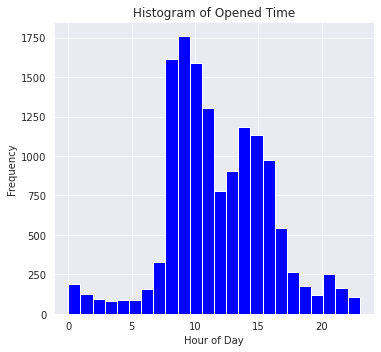

In [151]:
 # Histogram of N_opened_at
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['N_opened_at'].dt.hour, bins=24, color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of Opened Time')

plt.tight_layout()
plt.show()

In [152]:
hour_stats = df['N_opened_at'].dt.hour.describe(percentiles=[0.1, 0.9])

print(hour_stats)

count    14026.000000
mean        11.760231
std          4.236137
min          0.000000
10%          8.000000
50%         11.000000
90%         17.000000
max         23.000000
Name: N_opened_at, dtype: float64


In [153]:
# We decided to look on cases where N_opened_at is between 8am and 6pm as this time span covers most of the incidents and we believe
# that also this time span represents the working hours

In [154]:
df = df[(df['N_opened_at'].dt.time >= pd.to_datetime('08:00').time()) & (df['N_opened_at'].dt.time <= pd.to_datetime('17:59').time())]
df['N_opened_at'].dt.hour.describe(percentiles=[0.1, 0.9])

count    11788.000000
mean        11.752036
std          2.817581
min          8.000000
10%          8.000000
50%         11.000000
90%         16.000000
max         17.000000
Name: N_opened_at, dtype: float64

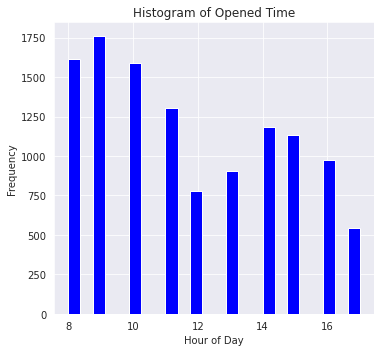

In [155]:
 # Histogram of N_opened_at
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['N_opened_at'].dt.hour, bins=24, color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of Opened Time')

plt.tight_layout()
plt.show()

In [156]:
df['C_Incident_opened_DayOfWeek'] = df['N_opened_at'].dt.dayofweek

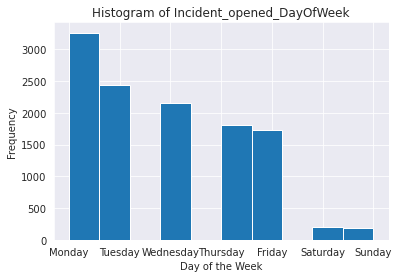

In [157]:
plt.hist(df['C_Incident_opened_DayOfWeek'])
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Histogram of Incident_opened_DayOfWeek')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

In [158]:
def display_occurrences(df, columns):
    total_rows = len(df)
    
    for column in columns:
        count_values = df[column].value_counts().sort_index()
        count_df = pd.DataFrame({column: count_values.index, 'Count': count_values.values})
        count_df['Percentage'] = count_df['Count'] / total_rows * 100
        print(f"Occurrences for variable '{column}':")
        print(count_df)
        print()

# Assuming you have a DataFrame named df with the specified variables
columns = ['N_reassignment_count', 'N_reopen_count', 'N_sys_mod_count']
display_occurrences(df, columns)

Occurrences for variable 'N_reassignment_count':
    N_reassignment_count  Count  Percentage
0                      0   7557   64.107567
1                      1   2894   24.550390
2                      2    768    6.515100
3                      3    316    2.680692
4                      4    154    1.306413
5                      5     56    0.475059
6                      6     23    0.195114
7                      7     11    0.093315
8                      8      4    0.033933
9                      9      2    0.016966
10                    11      2    0.016966
11                    13      1    0.008483

Occurrences for variable 'N_reopen_count':
   N_reopen_count  Count  Percentage
0               0  11744   99.626739
1               1     42    0.356295
2               2      2    0.016966

Occurrences for variable 'N_sys_mod_count':
    N_sys_mod_count  Count  Percentage
0                 1    199    1.688157
1                 2   4673   39.642009
2                 3   251

## Graphs

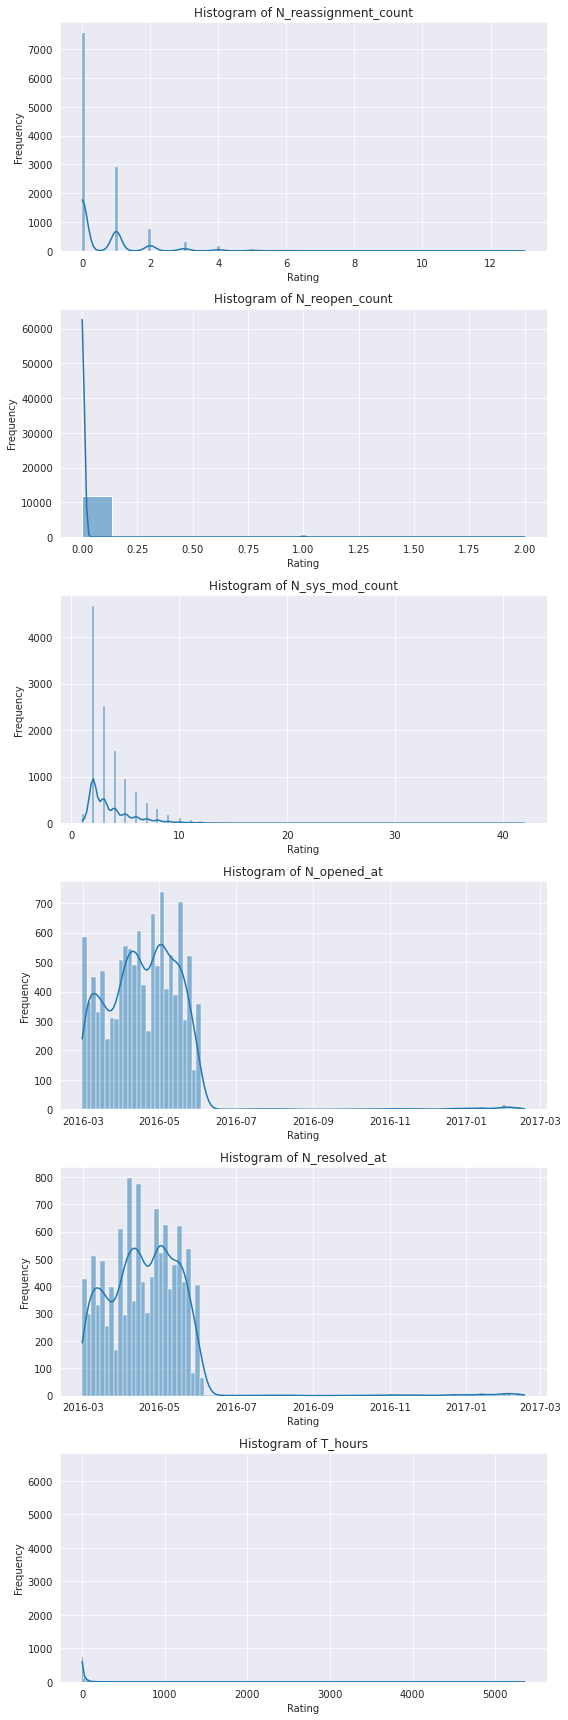

In [159]:
import seaborn as sns

rating_features = ['N_reassignment_count', 'N_reopen_count', 'N_sys_mod_count', 'N_opened_at', 'N_resolved_at', 'T_hours']

fig, axes = plt.subplots(nrows=len(rating_features), ncols=1, figsize=(8, 24))

for i, feature in enumerate(rating_features):
    sns.histplot(df[feature].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of the observations have no frequent modifications

In [160]:
num_bins = 15
bins = pd.cut(df['N_opened_at'], bins=num_bins)
bin_counts = bins.value_counts().sort_index()

print(bin_counts)

(2016-02-28 23:34:18.360000, 2016-03-23 21:15:56]    2642
(2016-03-23 21:15:56, 2016-04-16 10:28:52]           3105
(2016-04-16 10:28:52, 2016-05-09 23:41:48]           3201
(2016-05-09 23:41:48, 2016-06-02 12:54:44]           2724
(2016-06-02 12:54:44, 2016-06-26 02:07:40]              2
(2016-06-26 02:07:40, 2016-07-19 15:20:36]              6
(2016-07-19 15:20:36, 2016-08-12 04:33:32]              7
(2016-08-12 04:33:32, 2016-09-04 17:46:28]              1
(2016-09-04 17:46:28, 2016-09-28 06:59:24]              3
(2016-09-28 06:59:24, 2016-10-21 20:12:20]              4
(2016-10-21 20:12:20, 2016-11-14 09:25:16]              9
(2016-11-14 09:25:16, 2016-12-07 22:38:12]              8
(2016-12-07 22:38:12, 2016-12-31 11:51:08]             15
(2016-12-31 11:51:08, 2017-01-24 01:04:04]             21
(2017-01-24 01:04:04, 2017-02-16 14:17:00]             40
Name: N_opened_at, dtype: int64


In [161]:
# we will use data only until May of 2016
df = df[df['N_opened_at'] <= '2016-05-31']

In [162]:
num_bins = 20
bins = pd.cut(df['T_hours'], bins=num_bins)
bin_counts = bins.value_counts().sort_index()

print(bin_counts)

(-5.353, 267.65]     11446
(267.65, 535.3]         15
(535.3, 802.95]         30
(802.95, 1070.6]         1
(1070.6, 1338.25]        5
(1338.25, 1605.9]        0
(1605.9, 1873.55]        0
(1873.55, 2141.2]        0
(2141.2, 2408.85]        0
(2408.85, 2676.5]        0
(2676.5, 2944.15]        0
(2944.15, 3211.8]        0
(3211.8, 3479.45]        0
(3479.45, 3747.1]        0
(3747.1, 4014.75]        0
(4014.75, 4282.4]        0
(4282.4, 4550.05]        0
(4550.05, 4817.7]        0
(4817.7, 5085.35]        0
(5085.35, 5353.0]        1
Name: T_hours, dtype: int64


In [163]:
count = len(df[df['T_hours'] < 0 ])

print("Number of rows where T_hours is lower than 0:", count)

Number of rows where T_hours is lower than 0: 0


In [164]:
df["N_sys_mod_count"].describe(percentiles=[0.1, 0.9])

count    11498.000000
mean         3.631414
std          2.249350
min          1.000000
10%          2.000000
50%          3.000000
90%          7.000000
max         42.000000
Name: N_sys_mod_count, dtype: float64

In [165]:
num_bins = 15
bins = pd.cut(df['N_sys_mod_count'], bins=num_bins)
bin_counts = bins.value_counts().sort_index()

print(bin_counts)

(0.959, 3.733]      7210
(3.733, 6.467]      3074
(6.467, 9.2]         923
(9.2, 11.933]        179
(11.933, 14.667]      81
(14.667, 17.4]        21
(17.4, 20.133]         6
(20.133, 22.867]       1
(22.867, 25.6]         1
(25.6, 28.333]         0
(28.333, 31.067]       1
(31.067, 33.8]         0
(33.8, 36.533]         0
(36.533, 39.267]       0
(39.267, 42.0]         1
Name: N_sys_mod_count, dtype: int64


In [166]:
df['N_sys_mod_count'].value_counts()

2     4556
3     2455
4     1504
5      929
6      641
7      433
8      310
1      199
9      180
10     112
11      67
12      48
13      19
14      14
17       7
15       7
16       7
18       3
19       2
29       1
42       1
22       1
20       1
23       1
Name: N_sys_mod_count, dtype: int64

In [167]:
df['C_Day_of_Month'] = df['N_opened_at'].dt.day

In [168]:
df['C_Week_of_Month'] = (df['C_Day_of_Month'] - 1) // 7 + 1

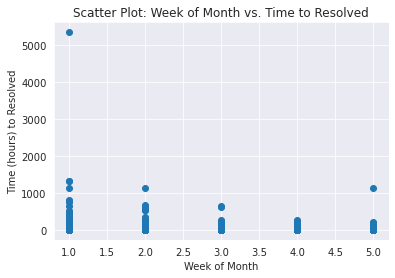

In [169]:
plt.scatter(df['C_Week_of_Month'], df['T_hours'])

# Set the axis labels and title
plt.xlabel('Week of Month')
plt.ylabel('Time (hours) to Resolved')
plt.title('Scatter Plot: Week of Month vs. Time to Resolved')

# Display the plot
plt.show()

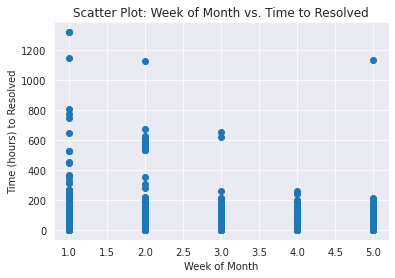

In [170]:
df = df[df['T_hours'] < 4000]
plt.scatter(df['C_Week_of_Month'], df['T_hours'])

# Set the axis labels and title
plt.xlabel('Week of Month')
plt.ylabel('Time (hours) to Resolved')
plt.title('Scatter Plot: Week of Month vs. Time to Resolved')

# Display the plot
plt.show()

In [171]:
df.reset_index(drop=True, inplace=True)
df

,C_number,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,N_opened_at,C_contact_type,C_location,C_category,C_subcategory,...,C_knowledge,C_u_priority_confirmation,C_notify,C_closed_code,C_resolved_by,N_resolved_at,T_hours,C_Incident_opened_DayOfWeek,C_Day_of_Month,C_Week_of_Month
0,INC0000066,1,0,3,True,2016-02-29 08:03:00,Phone,Location 161,Category 55,Subcategory 185,...,True,False,Do Not Notify,code 5,Resolved by 208,2016-03-02 14:37:00,54.566667,0,29,5
1,INC0000067,1,0,10,True,2016-02-29 08:03:00,Phone,Location 143,Category 9,Subcategory 110,...,True,False,Do Not Notify,code 1,Resolved by 215,2016-03-02 11:11:00,51.133333,0,29,5
2,INC0000071,0,0,7,True,2016-02-29 08:12:00,Phone,Location 161,Category 9,Subcategory 164,...,True,False,Do Not Notify,code 5,Resolved by 227,2016-03-01 10:38:00,26.433333,0,29,5
3,INC0000076,0,0,2,True,2016-02-29 08:25:00,Phone,Location 93,Category 42,Subcategory 224,...,True,False,Do Not Notify,code 5,Resolved by 62,2016-02-29 16:27:00,8.033333,0,29,5
4,INC0000077,0,0,5,True,2016-02-29 08:27:00,Phone,Location 108,Category 32,Subcategory 9,...,True,False,Do Not Notify,code 6,Resolved by 85,2016-02-29 09:04:00,0.616667,0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11492,INC0033956,0,0,2,True,2016-05-30 17:07:00,Phone,Location 93,Category 42,Subcategory 223,...,False,True,Do Not Notify,code 6,Resolved by 11,2016-05-30 17:13:00,0.100000,0,30,5
11493,INC0033958,0,0,3,True,2016-05-30 17:10:00,Phone,Location 55,Category 46,Subcategory 150,...,False,True,Do Not Notify,code 6,Resolved by 125,2016-05-31 10:11:00,17.016667,0,30,5
11494,INC0033961,0,0,6,True,2016-05-30 17:24:00,Phone,Location 93,Category 26,Subcategory 164,...,False,True,Do Not Notify,code 4,Resolved by 103,2016-06-01 09:57:00,40.550000,0,30,5
11495,INC0033963,0,0,2,True,2016-05-30 17:39:00,Phone,Location 35,Category 26,Subcategory 175,...,False,True,Do Not Notify,code 6,Resolved by 11,2016-05-30 17:45:00,0.100000,0,30,5


In [172]:
df['T_hours'].describe(percentiles=[0.025, 0.975])

count    11497.000000
mean        19.393242
std         51.973159
min          0.000000
2.5%         0.033333
50%          1.166667
97.5%      117.026667
max       1321.116667
Name: T_hours, dtype: float64

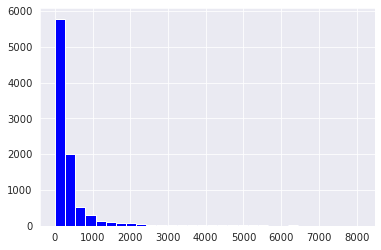

In [173]:
plt.hist(false_df['T_hours'], bins=30, color='blue')
plt.show()

In [174]:
df = df[df['T_hours'] > 0]
df['T_hours_transformed'] = np.log(df['T_hours'])

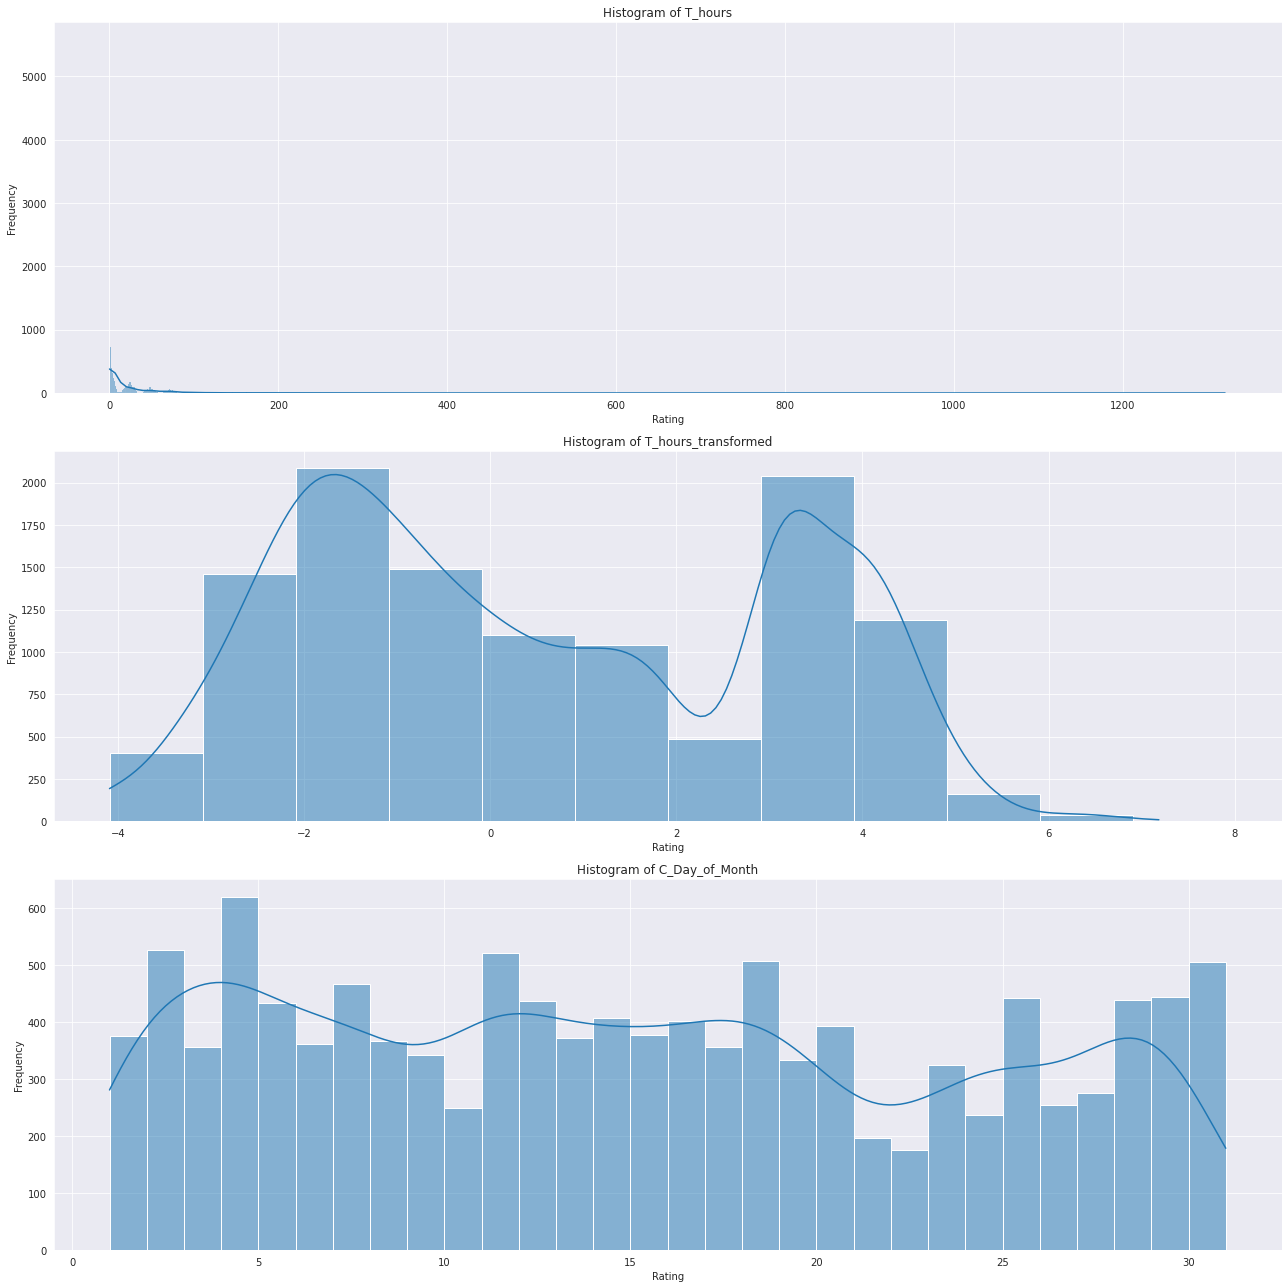

In [175]:
rating_features = ['T_hours','T_hours_transformed',"C_Day_of_Month"]

fig, axes = plt.subplots(nrows=len(rating_features), ncols=1, figsize=(18, 18))

for i, feature in enumerate(rating_features):
    sns.histplot(df[feature].dropna(), ax=axes[i], kde=True, binwidth=1)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [176]:
df

,C_number,N_reassignment_count,N_reopen_count,N_sys_mod_count,C_made_sla,N_opened_at,C_contact_type,C_location,C_category,C_subcategory,...,C_u_priority_confirmation,C_notify,C_closed_code,C_resolved_by,N_resolved_at,T_hours,C_Incident_opened_DayOfWeek,C_Day_of_Month,C_Week_of_Month,T_hours_transformed
0,INC0000066,1,0,3,True,2016-02-29 08:03:00,Phone,Location 161,Category 55,Subcategory 185,...,False,Do Not Notify,code 5,Resolved by 208,2016-03-02 14:37:00,54.566667,0,29,5,3.999423
1,INC0000067,1,0,10,True,2016-02-29 08:03:00,Phone,Location 143,Category 9,Subcategory 110,...,False,Do Not Notify,code 1,Resolved by 215,2016-03-02 11:11:00,51.133333,0,29,5,3.934437
2,INC0000071,0,0,7,True,2016-02-29 08:12:00,Phone,Location 161,Category 9,Subcategory 164,...,False,Do Not Notify,code 5,Resolved by 227,2016-03-01 10:38:00,26.433333,0,29,5,3.274626
3,INC0000076,0,0,2,True,2016-02-29 08:25:00,Phone,Location 93,Category 42,Subcategory 224,...,False,Do Not Notify,code 5,Resolved by 62,2016-02-29 16:27:00,8.033333,0,29,5,2.083600
4,INC0000077,0,0,5,True,2016-02-29 08:27:00,Phone,Location 108,Category 32,Subcategory 9,...,False,Do Not Notify,code 6,Resolved by 85,2016-02-29 09:04:00,0.616667,0,29,5,-0.483427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11492,INC0033956,0,0,2,True,2016-05-30 17:07:00,Phone,Location 93,Category 42,Subcategory 223,...,True,Do Not Notify,code 6,Resolved by 11,2016-05-30 17:13:00,0.100000,0,30,5,-2.302585
11493,INC0033958,0,0,3,True,2016-05-30 17:10:00,Phone,Location 55,Category 46,Subcategory 150,...,True,Do Not Notify,code 6,Resolved by 125,2016-05-31 10:11:00,17.016667,0,30,5,2.834193
11494,INC0033961,0,0,6,True,2016-05-30 17:24:00,Phone,Location 93,Category 26,Subcategory 164,...,True,Do Not Notify,code 4,Resolved by 103,2016-06-01 09:57:00,40.550000,0,30,5,3.702536
11495,INC0033963,0,0,2,True,2016-05-30 17:39:00,Phone,Location 35,Category 26,Subcategory 175,...,True,Do Not Notify,code 6,Resolved by 11,2016-05-30 17:45:00,0.100000,0,30,5,-2.302585


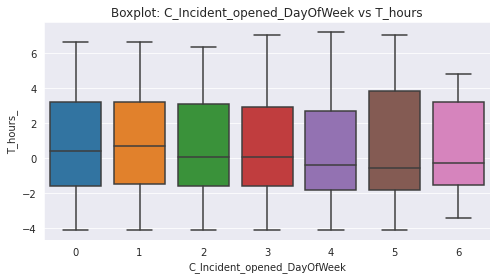

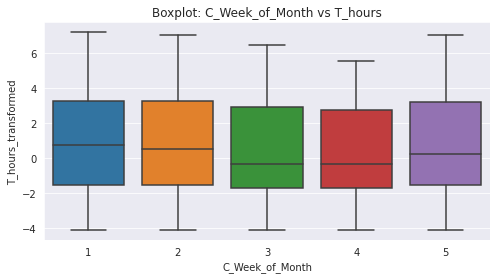

In [177]:
import seaborn as sns

x1 = df['C_Incident_opened_DayOfWeek']
x2 = df['C_Week_of_Month']
y = df['T_hours_transformed']

# Boxplot 1: C_Incident_opened_DayOfWeek vs T_hours
plt.figure(figsize=(8, 4))
sns.boxplot(x=x1, y=y)
plt.xlabel('C_Incident_opened_DayOfWeek')
plt.ylabel('T_hours_')
plt.title('Boxplot: C_Incident_opened_DayOfWeek vs T_hours')

# Boxplot 2: C_Week_of_Month vs T_hours
plt.figure(figsize=(8, 4))
sns.boxplot(x=x2, y=y)
plt.xlabel('C_Week_of_Month')
plt.ylabel('T_hours_transformed')
plt.title('Boxplot: C_Week_of_Month vs T_hours')

# Display the plots
plt.show()


No sufficient difference

In [178]:
## Boxplots

In [179]:
# Counting NA values
print(df.isna().sum(axis=0))

C_number                       0
N_reassignment_count           0
N_reopen_count                 0
N_sys_mod_count                0
C_made_sla                     0
N_opened_at                    0
C_contact_type                 0
C_location                     0
C_category                     0
C_subcategory                  0
C_impact                       0
C_urgency                      0
C_priority                     0
C_knowledge                    0
C_u_priority_confirmation      0
C_notify                       0
C_closed_code                  0
C_resolved_by                  0
N_resolved_at                  0
T_hours                        0
C_Incident_opened_DayOfWeek    0
C_Day_of_Month                 0
C_Week_of_Month                0
T_hours_transformed            0
dtype: int64


In [180]:
def plot_categorical_features(df):
    categorical_features = ['C_made_sla', 'C_impact', 'C_urgency',
                            'C_priority', 'C_knowledge', 'C_u_priority_confirmation',
                            'C_closed_code']
    target_variable = 'T_hours_transformed'

    fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(16, 24))

    for i, feature in enumerate(categorical_features):
        sns.boxplot(x=feature, y=target_variable, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target_variable)

    plt.tight_layout()
    plt.show()


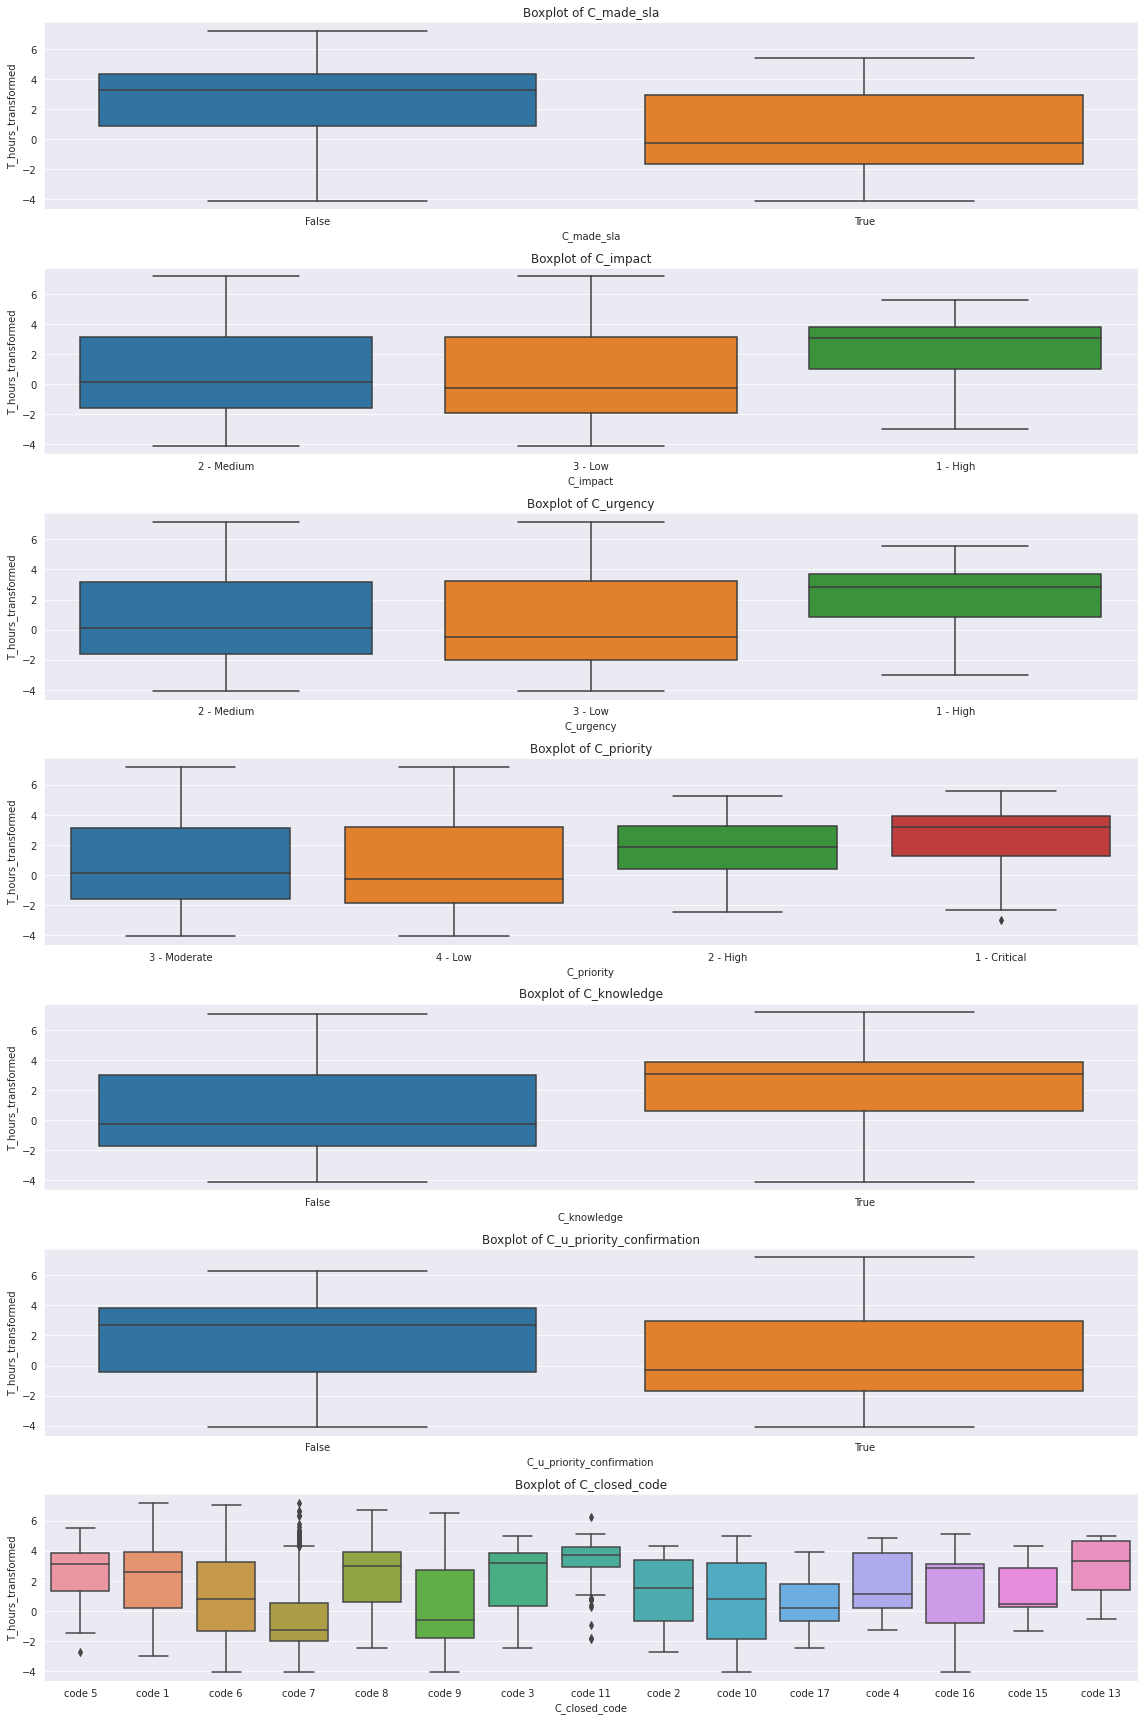

In [181]:
plot_categorical_features(df)

In [182]:
# drop of categorical features with only one value
df = df.drop(columns=['C_notify'])

In [183]:
#group this
pd.set_option('display.max_rows', None)
df['C_location'].value_counts()

Location 204    2435
Location 161    2121
Location 143    1339
Location 108    1080
Location 93      953
Location 51      852
Location 43      186
Location 179     142
Location 111     139
Location 55      111
Location 46      101
Location 135      80
Location 96       70
Location 54       69
Location 188      68
Location 39       67
Location 42       65
Location 97       63
Location 128      63
Location 229      60
Location 56       54
Location 125      49
Location 41       45
Location 38       44
Location 44       44
Location 136      43
Location 35       42
Location 15       38
Location 165      37
Location 34       35
Location 222      34
Location 45       33
Location 18       31
Location 47       30
Location 173      29
Location 91       28
Location 83       28
Location 36       27
Location 59       27
Location 37       27
Location 33       27
Location 71       26
Location 199      24
Location 40       22
Location 131      20
Location 242      20
Location 197      20
Location 224 

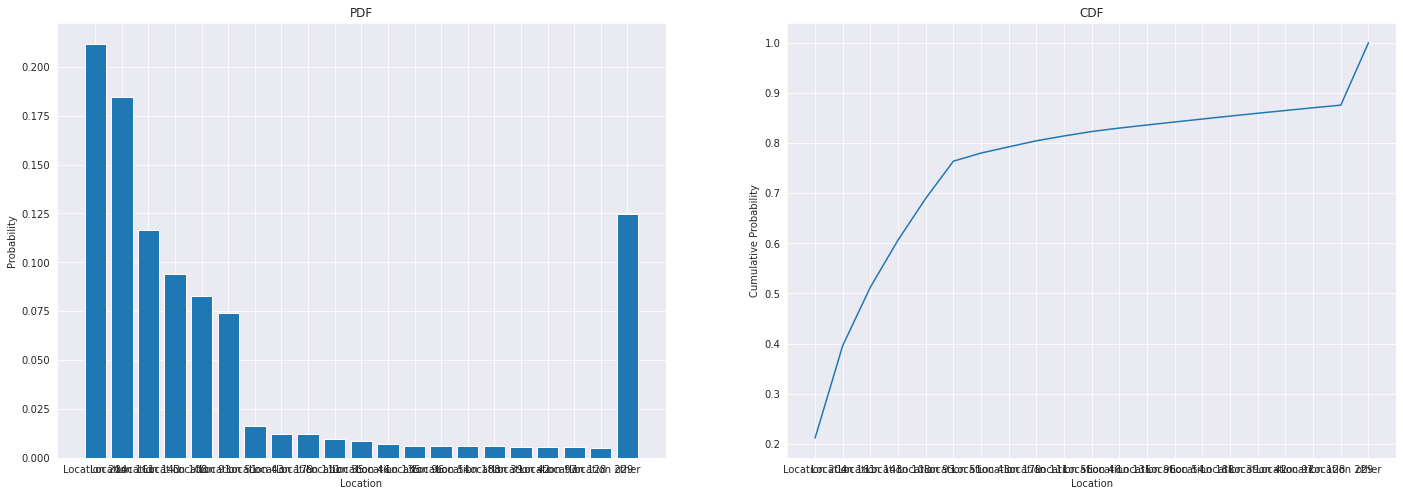

In [184]:
# Group the data by the "Location" column and count the number of occurrences of each location
counts = df.groupby('C_location')['C_location'].count()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)

# Calculate the PDF and CDF
pdf = counts / counts.sum()
cdf = pdf.cumsum()

# Identify the locations to wrap into the "other" category
other_count = counts[20:].sum()

# Create a new DataFrame with the counts for the top 20 locations and the "other" category
top_counts = counts[:20].append(pd.Series({'other': other_count}))

# Calculate the PDF and CDF for the top 20 locations and the "other" category
top_pdf = top_counts / top_counts.sum()
top_cdf = top_pdf.cumsum()

# Plot the PDF and CDF charts
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
ax[0].bar(top_pdf.index, top_pdf)
ax[0].set_title('PDF')
ax[0].set_xlabel('Location')
ax[0].set_ylabel('Probability')
ax[1].plot(top_cdf.index, top_cdf)
ax[1].set_title('CDF')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Cumulative Probability')
plt.show()

In [185]:
category_counts = df['C_location'].value_counts()

# Get the top 20 categories by frequency
top_categories = category_counts.nlargest(20).index.tolist()

df['C_location'] = df['C_location'].apply(lambda x: x if x in top_categories else 'other')

df['C_location'].value_counts()

Location 204    2435
Location 161    2121
other           1431
Location 143    1339
Location 108    1080
Location 93      953
Location 51      852
Location 43      186
Location 179     142
Location 111     139
Location 55      111
Location 46      101
Location 135      80
Location 96       70
Location 54       69
Location 188      68
Location 39       67
Location 42       65
Location 97       63
Location 128      63
Location 229      60
Name: C_location, dtype: int64

In [186]:
#group this
df['C_category'].str.lower().value_counts()

category 42    2061
category 26    1756
category 53    1348
category 46     723
category 32     666
category 37     638
category 9      589
category 23     530
category 20     528
category 35     372
category 61     364
category 57     334
category 24     315
category 40     187
category 45     173
category 34     162
category 44     145
category 51     140
category 19     119
category 28      97
category 43      65
category 13      64
category 17      27
category 55      25
category 8       23
category 22      11
category 38      11
category 7        6
category 63       5
category 47       3
category 54       3
category 62       2
category 56       1
category 31       1
category 25       1
Name: C_category, dtype: int64

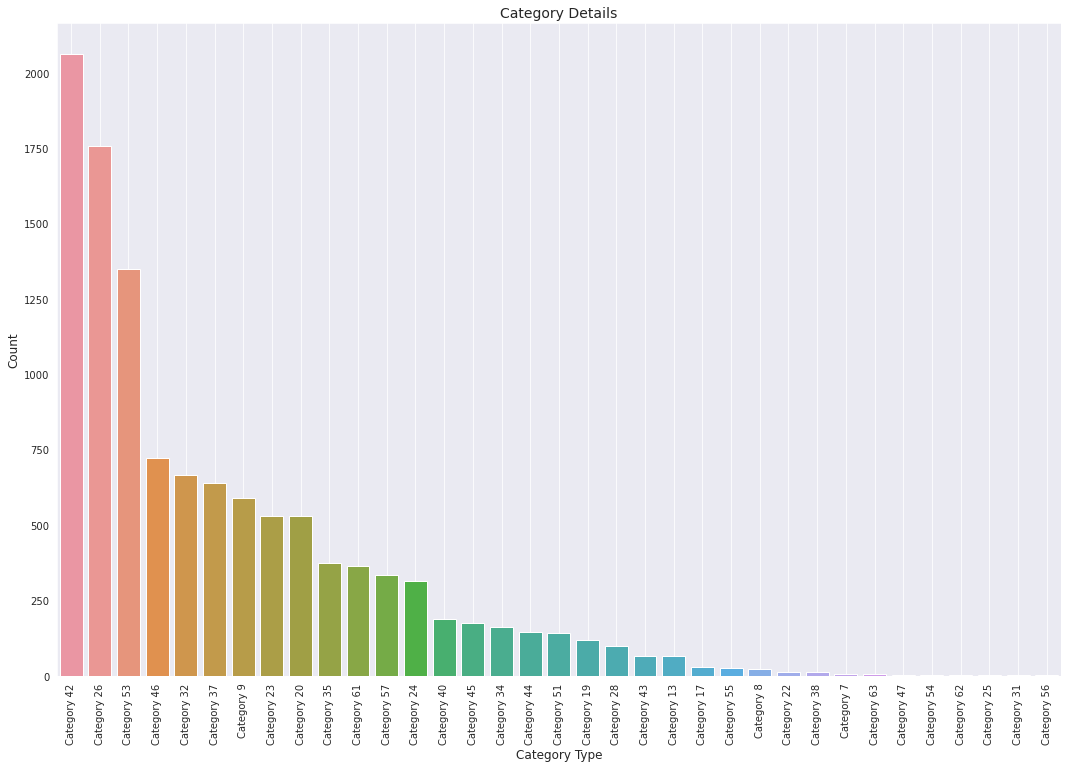

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

category_counts = df['C_category'].value_counts().sort_values(ascending=False)  # Sort categories by count in descending order

sns.countplot(x='C_category', data=df, order=category_counts.index, ax=ax)  # Pass the ordered category index to countplot

plt.title("Category Details", size=14)
plt.xlabel("Category Type", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [188]:
category_counts = df['C_category'].value_counts()

# Get the top 20 categories by frequency
top_categories = category_counts.nlargest(20).index.tolist()

df['C_category'] = df['C_category'].apply(lambda x: x if x in top_categories else 'other')

df['C_category'].value_counts()

Category 42    2061
Category 26    1756
Category 53    1348
Category 46     723
Category 32     666
Category 37     638
Category 9      589
Category 23     530
Category 20     528
Category 35     372
Category 61     364
Category 57     334
Category 24     315
other           248
Category 40     187
Category 45     173
Category 34     162
Category 44     145
Category 51     140
Category 19     119
Category 28      97
Name: C_category, dtype: int64

In [189]:
#also group this
df['C_subcategory'].value_counts()

Subcategory 174    2955
Subcategory 223    2003
Subcategory 175     923
Subcategory 164     683
Subcategory 9       407
Subcategory 275     349
Subcategory 28      322
Subcategory 135     322
Subcategory 36      208
Subcategory 125     191
Subcategory 103     176
Subcategory 170     155
Subcategory 123     153
Subcategory 303     135
Subcategory 3       124
Subcategory 75      103
Subcategory 29       89
Subcategory 114      86
Subcategory 43       77
Subcategory 202      63
Subcategory 200      62
Subcategory 44       62
Subcategory 31       60
Subcategory 16       54
Subcategory 117      53
Subcategory 168      52
Subcategory 300      52
Subcategory 163      51
Subcategory 185      46
Subcategory 150      44
Subcategory 251      42
Subcategory 94       41
Subcategory 285      40
Subcategory 80       37
Subcategory 302      36
Subcategory 191      35
Subcategory 82       34
Subcategory 224      33
Subcategory 69       32
Subcategory 130      31
Subcategory 231      29
Subcategory 154 

In [190]:
category_counts = df['C_subcategory'].value_counts()

# Get the top 20 categories by frequency
top_subcategories = category_counts.nlargest(20).index.tolist()

df['C_subcategory'] = df['C_subcategory'].apply(lambda x: x if x in top_subcategories else 'other')

df['C_subcategory'].value_counts()

Subcategory 174    2955
Subcategory 223    2003
other              1971
Subcategory 175     923
Subcategory 164     683
Subcategory 9       407
Subcategory 275     349
Subcategory 135     322
Subcategory 28      322
Subcategory 36      208
Subcategory 125     191
Subcategory 103     176
Subcategory 170     155
Subcategory 123     153
Subcategory 303     135
Subcategory 3       124
Subcategory 75      103
Subcategory 29       89
Subcategory 114      86
Subcategory 43       77
Subcategory 202      63
Name: C_subcategory, dtype: int64

In [191]:
# group this
df['C_closed_code'].value_counts()

code 6     6663
code 7     2652
code 9     1206
code 5      266
code 8      198
code 10     131
code 1      122
code 11      89
code 16      67
code 4       38
code 3       24
code 2       15
code 17      13
code 15       7
code 13       4
Name: C_closed_code, dtype: int64

In [192]:
category_counts = df['C_closed_code'].value_counts()

# Get the top 10 categories by frequency
top_codes = category_counts.nlargest(5).index.tolist()

df['C_closed_code'] = df['C_closed_code'].apply(lambda x: x if x in top_codes else 'other')

df['C_closed_code'].value_counts()

code 6    6663
code 7    2652
code 9    1206
other      510
code 5     266
code 8     198
Name: C_closed_code, dtype: int64

## DF split

In [193]:
# Split features into cat and num
C_features = df.filter(regex='^C')
print(C_features.columns)

N_features = df.filter(regex='^N')
print(N_features.columns)

Index(['C_number', 'C_made_sla', 'C_contact_type', 'C_location', 'C_category',
       'C_subcategory', 'C_impact', 'C_urgency', 'C_priority', 'C_knowledge',
       'C_u_priority_confirmation', 'C_closed_code', 'C_resolved_by',
       'C_Incident_opened_DayOfWeek', 'C_Day_of_Month', 'C_Week_of_Month'],
      dtype='object')
Index(['N_reassignment_count', 'N_reopen_count', 'N_sys_mod_count',
       'N_opened_at', 'N_resolved_at'],
      dtype='object')


## Histogramy

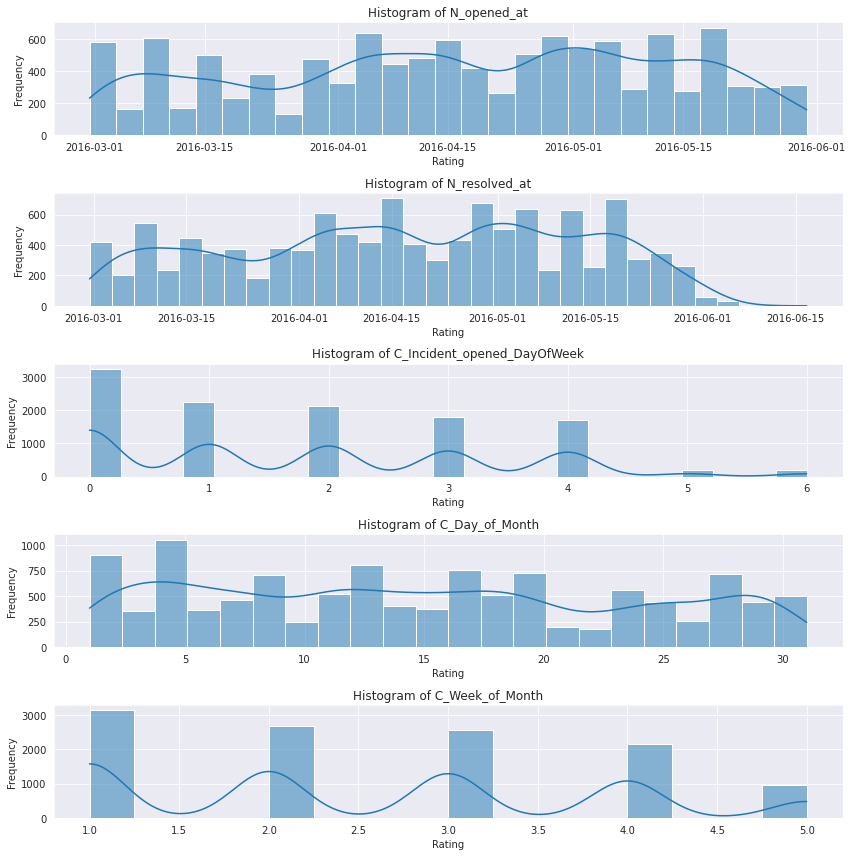

In [194]:
import seaborn as sns

rating_features = ['N_opened_at', 'N_resolved_at', 'C_Incident_opened_DayOfWeek','C_Day_of_Month','C_Week_of_Month']

fig, axes = plt.subplots(nrows=len(rating_features), ncols=1, figsize=(12, 12))

for i, feature in enumerate(rating_features):
    sns.set_style("darkgrid")
    sns.histplot(df[feature].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Boxploty

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_features(df):
    categorical_features = ['C_made_sla', 'C_impact', 'C_urgency',
                            'C_priority', 'C_knowledge', 'C_u_priority_confirmation',
                            'C_closed_code']
    
    target_variable = 'T_hours_transformed'
    
    fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(8, 24))
    
    for i, feature in enumerate(categorical_features):
        sns.set_style("darkgrid")
        sns.boxplot(x=feature, y=target_variable, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target_variable)
    
    plt.tight_layout()
    plt.show()

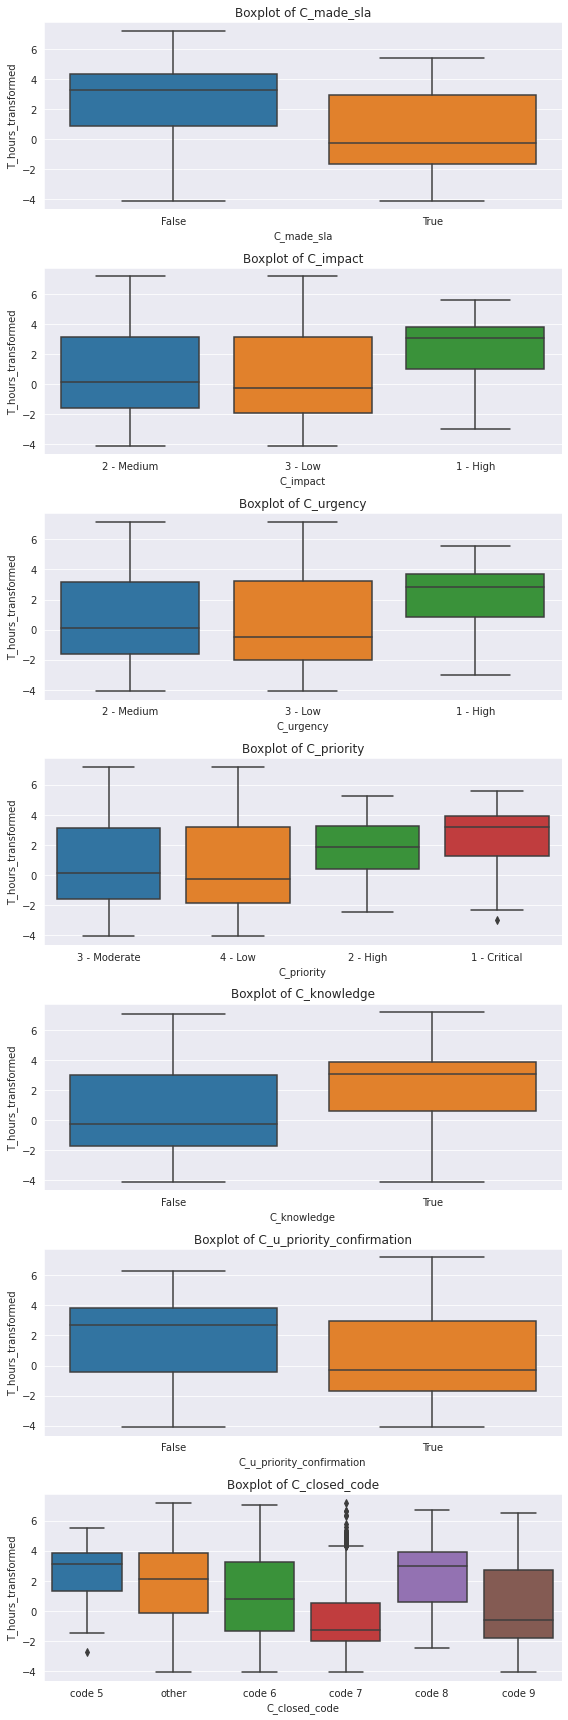

In [196]:
plot_categorical_features(df)

## Scatterploty

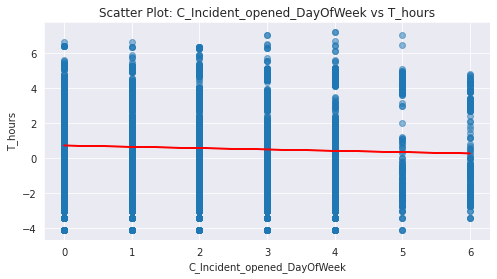

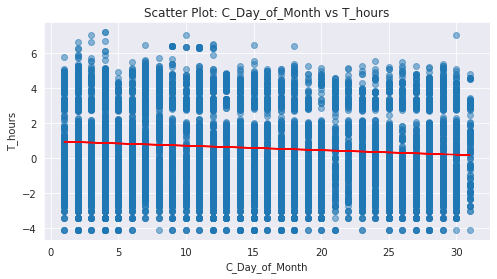

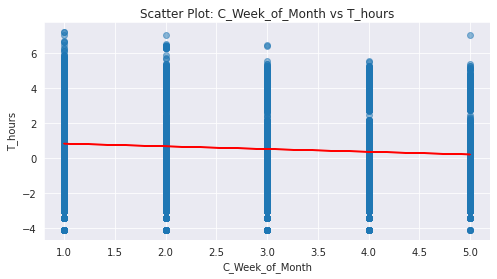

In [197]:
x3 = df['C_Incident_opened_DayOfWeek']
x4 = df['C_Day_of_Month']
x5 = df['C_Week_of_Month']
y = df['T_hours_transformed']

# Scatter plot 3: C_Incident_opened_DayOfWeek vs T_hours
plt.figure(figsize=(8, 4))
plt.scatter(x3, y, alpha=0.5)
plt.xlabel('C_Incident_opened_DayOfWeek')
plt.ylabel('T_hours')
plt.title('Scatter Plot: C_Incident_opened_DayOfWeek vs T_hours')

# Add trendline using numpy polyfit
m1, b1 = np.polyfit(x3, y, 1)
plt.plot(x3, m1 * x3 + b1, color='red')

# Scatter plot 4: C_Day_of_Month vs T_hours
plt.figure(figsize=(8, 4))
plt.scatter(x4, y, alpha=0.5)
plt.xlabel('C_Day_of_Month')
plt.ylabel('T_hours')
plt.title('Scatter Plot: C_Day_of_Month vs T_hours')

# Add trendline using numpy polyfit
m2, b2 = np.polyfit(x4, y, 1)
plt.plot(x4, m2 * x4 + b2, color='red')

# Scatter plot 5: C_Week_of_Month vs T_hours
plt.figure(figsize=(8, 4))
plt.scatter(x5, y, alpha=0.5)
plt.xlabel('C_Week_of_Month')
plt.ylabel('T_hours')
plt.title('Scatter Plot: C_Week_of_Month vs T_hours')

# Add trendline using numpy polyfit
m1, b1 = np.polyfit(x5, y, 1)
plt.plot(x5, m1 * x5 + b1, color='red')

# Display the plots
plt.show()

In [198]:
def mark_evening(row):
    if row['N_opened_at'].hour > 15:
        return 1
    else:
        return 0

# Apply the function to each row of the DataFrame and store the result in a new column
df['is_evening'] = df.apply(mark_evening, axis=1)
df[['N_opened_at', 'is_evening']].head(35)

,N_opened_at,is_evening
0,2016-02-29 08:03:00,0
1,2016-02-29 08:03:00,0
2,2016-02-29 08:12:00,0
3,2016-02-29 08:25:00,0
4,2016-02-29 08:27:00,0
5,2016-02-29 08:32:00,0
6,2016-02-29 08:33:00,0
7,2016-02-29 08:39:00,0
8,2016-02-29 08:43:00,0
9,2016-02-29 08:47:00,0


## Korelacna matica

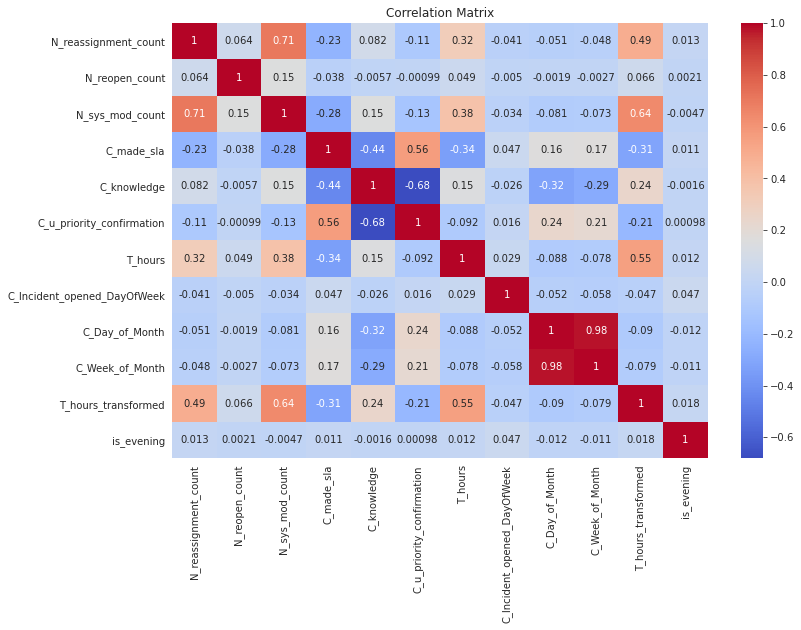

In [199]:
#correlation matrix T_hours vs. Numerical feat
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature check

In [200]:
 # Categorical features 
pd.set_option('display.max_rows', 500)

pivot_data = C_features.agg(['nunique']).T
pivot_data['over_8'] = np.where(pivot_data['nunique'] > 8, 1, 0).astype(int)

dict = {}
for x in C_features.columns:
    value_count = C_features[x].value_counts()
    value_count = value_count/C_features[x].count()
    dict[x] = value_count.where(lambda x : x < 0.05).count()
    
result = pd.merge(pivot_data, pd.Series(dict, name='under_5_perc'), left_index=True, right_index=True)
result['flag'] = np.where((result['over_8'] > 0) | (result['under_5_perc'] > 0), 1, 0)
display(result)

,nunique,over_8,under_5_perc,flag
C_number,11495,1,11495,1
C_made_sla,2,0,0,0
C_contact_type,1,0,0,0
C_location,21,1,14,1
C_category,21,1,14,1
C_subcategory,21,1,16,1
C_impact,3,0,2,1
C_urgency,3,0,2,1
C_priority,4,0,3,1
C_knowledge,2,0,0,0


In [201]:
N_features.describe()

,N_reassignment_count,N_reopen_count,N_sys_mod_count
count,11495.000000,11495.000000,11495.00000
mean,0.559026,0.003741,3.63184
std,0.978795,0.063836,2.24945
min,0.000000,0.000000,1.00000
25%,0.000000,0.000000,2.00000
50%,0.000000,0.000000,3.00000
75%,1.000000,0.000000,4.00000
max,13.000000,2.000000,42.00000


# ML Part


In [202]:
df_ml = df.drop(columns=['C_number','N_opened_at', 'N_resolved_at', 'N_reassignment_count',
                         'C_u_priority_confirmation', 'C_resolved_by', 'C_closed_code',
                         'C_Week_of_Month', 'C_Day_of_Month', 'C_made_sla', 'N_sys_mod_count',
                         'N_reopen_count', 'T_hours'])

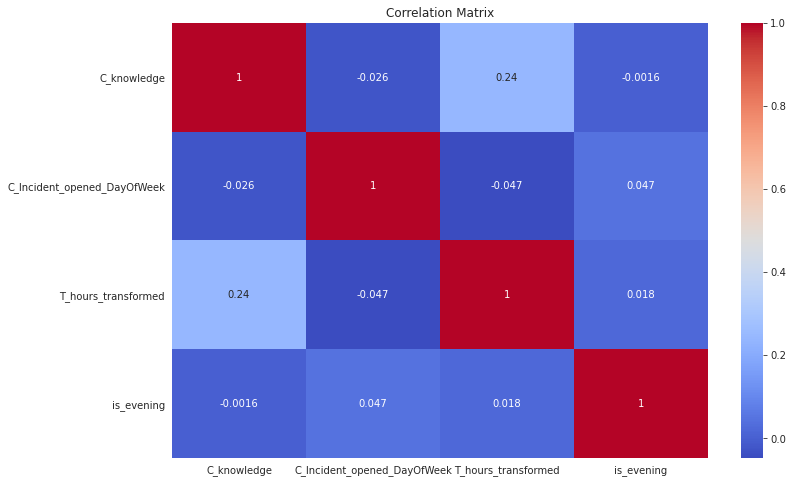

In [203]:
#correlation matrix df_ml
corr_matrix = df_ml.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [204]:
df_ml.columns

Index(['C_contact_type', 'C_location', 'C_category', 'C_subcategory',
       'C_impact', 'C_urgency', 'C_priority', 'C_knowledge',
       'C_Incident_opened_DayOfWeek', 'T_hours_transformed', 'is_evening'],
      dtype='object')

In [205]:
df_ml = pd.get_dummies(df_ml)

In [206]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('T_hours_transformed', axis=1)
y = df_ml['T_hours_transformed']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

In [207]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

print("Intercept:", round(lin_model.intercept_, 3))
print("Score:", round(lin_model.score(X_test, y_test), 3))

n = len(y)
p = X.shape[1]
r2 = lin_model.score(X_test, y_test)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-squared:", round(adj_r2, 3))

# y_pred = lin_model.predict(X_test)

Intercept: 27204218650715.746
Score: 0.195
R-squared: 0.19


## Random Forest

In [208]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [209]:
display(rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [210]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

display(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation across 10 different combinations
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [100]:
display(rf_random.best_params_)

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [101]:
best_rf_model = rf_random.best_estimator_

## Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [103]:
gbp_model = GradientBoostingRegressor(n_estimators=3000,
                                      learning_rate=0.05,
                                      max_depth=4,
                                      max_features='sqrt',
                                      min_samples_leaf=15,
                                      min_samples_split=10,
                                      loss='huber',
                                      random_state=42)

gbp_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=42)

## Model Evaluation

In [104]:
import sklearn.metrics as skm
from sklearn.metrics import r2_score

def evaluate_model(y_test, y_pred,X_test):
    print("R2 score =", round(skm.r2_score(y_test, y_pred), 4))
    n = len(y_test)
    p = X_test.shape[1]
    skm.r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    print("R2 adj score =", round(adj_r2, 4))
    print("Mean squared error =", round(skm.mean_squared_error(y_test, y_pred), 2))
    print("RMSE =", round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10))
    print("Mean absolute error =", round(skm.mean_absolute_error(y_test, y_pred), 2))
    print("Median absolute error =", round(skm.median_absolute_error(y_test, y_pred), 2))

In [105]:
df_evalution = pd.DataFrame(data=np.nan, index=range(5), columns=['Model','RMSE', 'RMSE non-log'])

## Evaluation Linear Model

In [106]:
y_pred_subset = lin_model.predict(X_test)
evaluate_model(y_test, y_pred_subset,X_test)
df_evalution.loc[0,'Model']='Linear Model'
df_evalution.loc[0,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred_subset))), 10)
df_evalution.loc[0,'RMSE non-log']=np.exp(df_evalution.loc[0,'RMSE'])

R2 score = 0.1953
R2 adj score = 0.1769
Mean squared error = 5.28
RMSE = 2.297555437
Mean absolute error = 1.92
Median absolute error = 1.75


## Evaluation Random Forest

Without hyper-parameter optimization


In [107]:
y_pred = rf_model.predict(X_test)
evaluate_model(y_test, y_pred,X_test)
df_evalution.loc[1,'Model']='Random Forest Model'
df_evalution.loc[1,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10)
df_evalution.loc[1,'RMSE non-log']=np.exp(df_evalution.loc[1,'RMSE'])

R2 score = 0.1179
R2 adj score = 0.1769
Mean squared error = 5.79
RMSE = 2.4055129596
Mean absolute error = 1.91
Median absolute error = 1.58


With hyper-parameter optimization


In [108]:
y_pred = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred,X_test)
df_evalution.loc[2,'Model']='Random Forest Model Hyper-Parametr'
df_evalution.loc[2,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10)
df_evalution.loc[2,'RMSE non-log']=np.exp(df_evalution.loc[2,'RMSE'])

R2 score = 0.2256
R2 adj score = 0.1769
Mean squared error = 5.08
RMSE = 2.2538679093
Mean absolute error = 1.89
Median absolute error = 1.73


## Evaluation Gradient Boosting

Without hyper-parameter optimization

In [109]:
y_pred = gb_model.predict(X_test)
evaluate_model(y_test, y_pred,X_test)
df_evalution.loc[3,'Model']='Gradient Boosting'
df_evalution.loc[3,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10)
df_evalution.loc[3,'RMSE non-log']=np.exp(df_evalution.loc[3,'RMSE'])

R2 score = 0.2065
R2 adj score = 0.1769
Mean squared error = 5.21
RMSE = 2.2814715689
Mean absolute error = 1.92
Median absolute error = 1.78


With hyper-parameter optimization

In [110]:
y_pred = gbp_model.predict(X_test)
evaluate_model(y_test, y_pred,X_test)
df_evalution.loc[4,'Model']='Gradient Boosting Hyper-Parametr'
df_evalution.loc[4,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred))), 10)
df_evalution.loc[4,'RMSE non-log']=np.exp(df_evalution.loc[4,'RMSE'])

R2 score = 0.2105
R2 adj score = 0.1769
Mean squared error = 5.18
RMSE = 2.2757085674
Mean absolute error = 1.85
Median absolute error = 1.64


## Comparison

In [111]:
sorted_df = df_evalution.sort_values('RMSE', ascending=True)
print('Sorted by RMSE in ascending order:\n')
print(sorted_df)

Sorted by RMSE in ascending order:

                                Model      RMSE  RMSE non-log
2  Random Forest Model Hyper-Parametr  2.253868      9.524505
4    Gradient Boosting Hyper-Parametr  2.275709      9.734814
3                   Gradient Boosting  2.281472      9.791078
0                        Linear Model  2.297555      9.949830
1                 Random Forest Model  2.405513     11.084115


The best model is Random Forest with Hyper-Parameter tuning

## The most important features in the RF model

In [112]:
import pandas as pd

# Get feature importances from the best_rf_model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame with feature names and importances
df_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df_feature_importances = df_feature_importances.sort_values('Importance', ascending=False)

# Display the sorted DataFrame
print(df_feature_importances.head(20))


                          Feature  Importance
56  C_subcategory_Subcategory 223    0.134554
0                     C_knowledge    0.132332
36         C_category_Category 42    0.102465
66            C_subcategory_other    0.073004
1     C_Incident_opened_DayOfWeek    0.068244
33         C_category_Category 35    0.040746
43         C_category_Category 61    0.029130
65    C_subcategory_Subcategory 9    0.027043
58   C_subcategory_Subcategory 28    0.025462
31         C_category_Category 32    0.024540
53  C_subcategory_Subcategory 174    0.017379
29         C_category_Category 26    0.016098
62   C_subcategory_Subcategory 36    0.014740
27         C_category_Category 23    0.013752
9         C_location_Location 161    0.013520
28         C_category_Category 24    0.013460
34         C_category_Category 37    0.013137
2                      is_evening    0.011985
44          C_category_Category 9    0.011793
12        C_location_Location 204    0.010656
